# Assignment 3 (Maksim Kaledin)

## Problem 1

Let $G(V,E)$ be a complete directed weighted graph with tiles as vertices $V$, and euclidean distances between tiles $i,j$ as weights $c_{ij}$. Denote by $\delta^+(v)$ all input edges and by $\delta^-(v)$ all output edges. Consider $f(e)\geq 0$ to be a flow through the edge $e$, $f(i,j)$ (in shorter notation, $f_{ij}$) corresponds to amount of ground transferred from tile $i$ to $j$. We also need to define demands and supplies $b_i=g'_i-g_i$ for each tile $i$, where $g_i$ is the current amount of ground at $i$ and $g'_i$ is the goal one. Negative $b_i$ note that there it too much ground while the positive ones show the demand for additional ground. Summing up, we have the following $LP$ problem.

$$\text{min}_{f_{ij}} \sum_{i\neq j}f_{ij},~ s.t.$$

$$\sum_{e \in \delta^+(i)}f(e) - \sum_{e \in \delta^-(i)}f(e) = b_i \quad \forall i\in V.$$

The constraints could be expressed easily since $G$ is a complete graph.

In [1]:
import cvxpy as cv
import numpy as np
import scipy as sp

n=20 # number of tiles

#tile positions
tiles=np.zeros((2,n*(n-1)))
for i in np.arange(4):
    for j in np.arange(5):
        tiles[0][i*5+j]=j
        tiles[1][i*5+j]=i

costs=np.array([sp.linalg.norm(tiles[:,j]-tiles[:,i],2) for j in np.arange(n) for i in np.arange(n) if not(j==i) ])


#demands
b=np.array([1,1,-4,-4,-4,
            1,1,-4,-14,-4,
            6,1,1,-4,1,
            6,6,6,1,6])

#constraints
A=np.zeros((n,n*(n-1)))

               
for i in np.arange(n):
    A[i,i*(n-1):(i+1)*(n-1)]=-1 # input edges

    if(i>0):
        A[i,np.array([k*(n-1)+i-1 for k in np.arange(i)])]=1 #for k<i
    
    if(i+1<n):
        A[i,np.array([k*(n-1)+i for k in np.arange(i+1,n)])]=1 #for k>i

print(A[:,:15])#just check if it is correctly generated

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [2]:
#CVX model
#variables
f = cv.Variable(n*(n-1))
#sequentially f_i1,...,f_ij,...,f_in with i != any of j

flowConstraints = [A*f == b, f>=0]
flowObj = cv.Minimize(costs*f)

flowProblem = cv.Problem(flowObj,flowConstraints)
flowProblem.solve(solver="GUROBI")

print ("status:",flowProblem.status)
print ("optimal value", flowProblem.value)
#print ("optimal var", f.value.reshape((n,n-1)))
res=f.value.reshape((n,n-1))


for i in np.arange(n):
    
    for el in [j for j in np.arange(n-1) if res[i,j]>0]:
        if(i<el):
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str((el-1) % 5)+","+str((el-1) // 5)+")"+": "+str(res[i,el]))
        else:
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str(el % 5)+","+str(el // 5)+")"+": "+str(res[i,el]))


status: optimal
optimal value 95.49106383667822
move from (1,0) to (0,0): 1.0
move from (2,0) to (1,0): 2.0
move from (2,0) to (3,0): 1.0
move from (2,0) to (4,0): 1.0
move from (3,0) to (3,1): 4.0
move from (4,0) to (1,3): 1.0
move from (4,0) to (2,3): 3.0
move from (2,1) to (3,1): 2.0
move from (2,1) to (4,1): 1.0
move from (2,1) to (3,2): 1.0
move from (3,1) to (0,2): 7.0
move from (3,1) to (3,2): 5.0
move from (3,1) to (0,3): 2.0
move from (4,1) to (2,2): 4.0
move from (2,2) to (4,2): 6.0
move from (3,2) to (0,3): 4.0
move from (4,2) to (2,3): 3.0


Note that Gurobi returned an integer solution. However there are fractional, according to CVX, even if we consider 1e-10 equals zero due to float point errors.

In [3]:
#CVX model
#variables
f = cv.Variable(n*(n-1))
#sequentially f_i1,...,f_ij,...,f_in with i != any of j

flowConstraints = [A*f == b, f>=0]
flowObj = cv.Minimize(costs*f)

flowProblem = cv.Problem(flowObj,flowConstraints)
flowProblem.solve()

print ("status:",flowProblem.status)
print ("optimal value", flowProblem.value)
#print ("optimal var", f.value.reshape((n,n-1)))
res=f.value.reshape((n,n-1))


for i in np.arange(n):
    
    for el in [j for j in np.arange(n-1) if res[i,j]>0]:
        if(i<el):
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str((el-1) % 5)+","+str((el-1) // 5)+")"+": "+str(res[i,el]))
        else:
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str(el % 5)+","+str(el // 5)+")"+": "+str(res[i,el]))


status: optimal
optimal value 95.4910638297555
move from (0,0) to (0,0): 2.08110600224e-11
move from (0,0) to (3,0): 1.81793079316e-10
move from (0,0) to (4,0): 1.95782968581e-11
move from (0,0) to (3,1): 9.0965702718e-11
move from (0,0) to (4,1): 6.00977727133e-12
move from (0,0) to (3,2): 4.45700990122e-11
move from (1,0) to (0,0): 0.532171543474
move from (1,0) to (1,0): 1.72445090092e-11
move from (1,0) to (3,0): 9.19387883737e-10
move from (1,0) to (4,0): 2.57596393401e-10
move from (1,0) to (0,1): 2.3491179658e-11
move from (1,0) to (3,1): 3.60445804567e-10
move from (1,0) to (4,1): 1.08317101262e-10
move from (1,0) to (0,2): 1.44558748348e-11
move from (1,0) to (3,2): 1.72158797332e-10
move from (1,0) to (4,2): 6.16516944325e-11
move from (1,0) to (0,3): 1.05373463301e-11
move from (2,0) to (0,0): 0.467828454981
move from (2,0) to (1,0): 1.53217154407
move from (2,0) to (2,0): 3.02184683988e-11
move from (2,0) to (3,0): 0.999999995756
move from (2,0) to (4,0): 0.999999991822
mov

## Problem 2

Let us implement the following algorithm in tow parts. The first one will operate with given opened facilities

## Problem 3

Let $x_{ij}$ be the binary variable which equals $1$, if student $i$ is assigned to room together with student $j$ for $i,j=1,..,20$ (considering $i<j$). Denote by $p_{ij}$ the (symmetric) preference matrix. The corresponding ILP problem can be formulated as

$$
\max_{x_{ij}} \sum_{i < j}p_{ij}x_{ij},~ s.t.
$$
$$
\sum_{i=2,..,20}\sum_{j < i} x_{ij} \leq 10,
$$
$$
\sum_{j<i}x_{ij} + \sum_{j>i}x_{ji} = 1 \quad \forall i=1,..,20.
$$



In [4]:
import gurobipy as grb
n=20#students
m=10#rooms

#preferences
prefs_matrix=np.random.uniform(0,1,(n,n))
prefs=dict([((i,j),prefs_matrix[i,j]) for i in np.arange(1,n) for j in np.arange(i) ])

#model definition
model=grb.Model("Assignment")
indexes=[(i,j) for i in np.arange(1,n) for j in np.arange(i)]

#variables
xij= model.addVars(indexes,vtype=grb.GRB.BINARY)

model.setObjective(xij.prod(prefs),grb.GRB.MAXIMIZE)

model.addConstr(xij.sum(),grb.GRB.LESS_EQUAL, m, "rooms")

for i in np.arange(1,n):
    expr = grb.LinExpr(np.array(np.ones(i)), [xij[i,j] for j in np.arange(i)])
    expr.addTerms(np.array(np.ones(n-1-i)), [xij[j,i] for j in np.arange(i+1,n)])
    model.addConstr(expr,grb.GRB.EQUAL,1)

model.optimize()
#np.array([xij[i,j].x for i in np.arange(1,n) for j in np.arange(i)])
for el in indexes:
    el_lst=list(el)
    if(not(xij[el_lst[0],el_lst[1]].x==0)):
        print(el,xij[el_lst[0],el_lst[1]].x)

Optimize a model with 20 rows, 190 columns and 551 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.00s
Presolved: 20 rows, 190 columns, 532 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)

Root relaxation: objective 9.228451e+00, 18 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       9.2284507    9.22845  0.00%     -    0s

Explored 0 nodes (18 simplex iterations) in 0.01 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 9.22845 
Pool objective bound 9.22845

Optimal solution found (tolerance 1.00e-04)
Best objective 9.228450748003e+00, best bound 9.228450748003e+00, gap 0.0000%
(5, 1) 1.0
(6, 3) 1.0

Consider LP-relaxation and draw the graph with corresponding adjacency matrix.

In [5]:
#CVX solution

#preferences
prefs_cv=np.array([prefs_matrix[i,j] for i in np.arange(1,n) for j in np.arange(i) ])

#variables
xij_cv=cv.Variable(n*(n-1)//2)
indexes=[(i,j) for i in np.arange(1,n) for j in np.arange(i)]

#constraint matrix
A=np.zeros((n,n*(n-1)//2)) #n-1 for 1neighbour constraint + 1 for m rooms
A[0,:]=1#<=m rooms
start=0 # for indexing purposes
print(A.shape)
for i in np.arange(-1,n-1):
    if(i>=0):
        print('row',start+np.arange(i+1))
        A[i+1,start+np.arange(i)]=1 #row sum up to diagonal
    if(i<n-2):
        print('col',[np.sum(np.arange(j+2))-(j-i) for j in np.arange(i+1,n-1)])
        A[i+1,np.array([np.sum(np.arange(j+2))-(j-i) for j in np.arange(i+1,n-1)])]=1 #col sum up to diagonal
   
    start=start+i+1
    



(20, 190)
col [0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120, 136, 153, 171]
row [0]
col [2, 4, 7, 11, 16, 22, 29, 37, 46, 56, 67, 79, 92, 106, 121, 137, 154, 172]
row [1 2]
col [5, 8, 12, 17, 23, 30, 38, 47, 57, 68, 80, 93, 107, 122, 138, 155, 173]
row [3 4 5]
col [9, 13, 18, 24, 31, 39, 48, 58, 69, 81, 94, 108, 123, 139, 156, 174]
row [6 7 8 9]
col [14, 19, 25, 32, 40, 49, 59, 70, 82, 95, 109, 124, 140, 157, 175]
row [10 11 12 13 14]
col [20, 26, 33, 41, 50, 60, 71, 83, 96, 110, 125, 141, 158, 176]
row [15 16 17 18 19 20]
col [27, 34, 42, 51, 61, 72, 84, 97, 111, 126, 142, 159, 177]
row [21 22 23 24 25 26 27]
col [35, 43, 52, 62, 73, 85, 98, 112, 127, 143, 160, 178]
row [28 29 30 31 32 33 34 35]
col [44, 53, 63, 74, 86, 99, 113, 128, 144, 161, 179]
row [36 37 38 39 40 41 42 43 44]
col [54, 64, 75, 87, 100, 114, 129, 145, 162, 180]
row [45 46 47 48 49 50 51 52 53 54]
col [65, 76, 88, 101, 115, 130, 146, 163, 181]
row [55 56 57 58 59 60 61 62 63 64 65]
col [77, 89, 102, 

In [6]:
#CVX model

cv_right=np.ones((n,1)) #right part
cv_right[0]=m

problem_cv=cv.Problem(cv.Maximize(prefs_cv*xij_cv),
                      [A*xij_cv == cv_right,
                       xij_cv <=1,
                       xij_cv >=0])

problem_cv.solve()

print ("status:",problem_cv.status)
print ("optimal value", problem_cv.value)



status: optimal
optimal value 9.216530832685732


[1]
[2 3]
[3 4 5]
[4 5 6 7]
[5 6 7 8 9]
[ 6  7  8  9 10 11]
[ 7  8  9 10 11 12 13]
[ 8  9 10 11 12 13 14 15]
[ 9 10 11 12 13 14 15 16 17]
[10 11 12 13 14 15 16 17 18 19]
[11 12 13 14 15 16 17 18 19 20 21]
[12 13 14 15 16 17 18 19 20 21 22 23]
[13 14 15 16 17 18 19 20 21 22 23 24 25]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


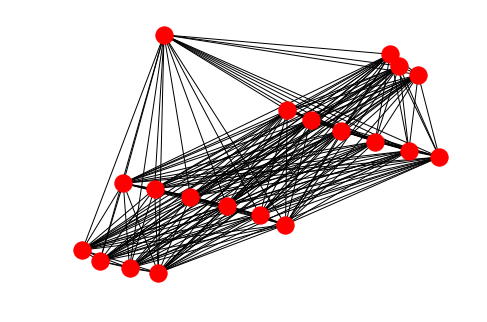

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

adj_mat= np.zeros((n,n))
for i in np.arange(1,n):
    print(np.sum(i)+np.arange(i))
    adj_mat[i,:i]=(xij_cv.value[np.sum(i)+np.arange(i)]).transpose()
    
G=nx.from_numpy_matrix(adj_mat)
nx.draw(G)#no any information
nx.write_gml(G, "test.gml")

In [35]:
## OTHER APPROACH
n=5 # 5 students


prefs2_matrix = np.random.uniform(0,1,size=(n,n))
prefs2_matrix = (prefs2_matrix+prefs2_matrix.T)/2
prefs2_matrix = prefs2_matrix - 10000*np.eye(n)
zij = cv.Variable(n*n)
A=np.zeros((2*n+n*(n-1)//2,n*n))

for i in np.arange(n):
    A[i,n*i+np.arange(n)]=1
    A[n+i,i+np.arange(0,n*n,n)]=1

kk=0
for i in np.arange(1,n):
    for j in np.arange(i):
        A[2*n+kk,i*n+j]=1
        A[2*n+kk,j*n+i]=-1
        kk=kk+1

f= np.zeros((n*(n-1)//2+2*n,1))
f[np.arange(2*n)]=1

probl = cv.Problem(cv.Maximize(np.array(prefs2_matrix.reshape(n*n,1)[:,0])*zij), [A*zij == f, zij>=0, zij<=1])

probl.solve()

print("status ",probl.status)
print ("optimal value ", probl.value)
print(zij.value.reshape(n,n))

status  optimal
optimal value  3.776282387915741
[[  1.50348656e-13   5.00000000e-01   1.81074830e-10   5.00000000e-01
    2.05008566e-11]
 [  5.00000000e-01   1.45269285e-13   1.03133709e-10   5.00000000e-01
    2.52094515e-10]
 [  1.81074843e-10   1.03133720e-10  -1.98271914e-13   5.15954597e-11
    1.00000000e+00]
 [  5.00000000e-01   5.00000000e-01   5.15954727e-11   1.53483755e-13
    6.32695394e-11]
 [  2.05008704e-11   2.52094531e-10   1.00000000e+00   6.32695290e-11
   -2.38968580e-13]]


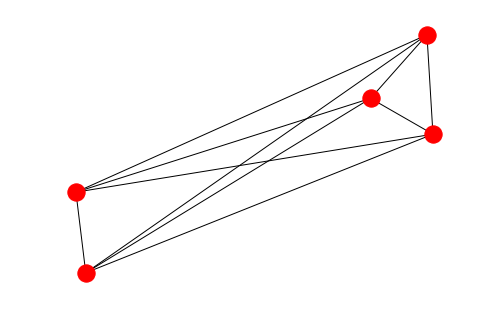

In [40]:
G=nx.from_numpy_matrix(zij.value.reshape(n,n))
nx.draw(G)
